## Data Science Take-Home Challenge 
### Samin Rastgoufard 
##### Email: samin.rastgoufard@gmail.com


#### Questions:

1. Both the training and testing data sets have the same schema.
2. The first column is the binary target - 0 or 1.
3. The remaining columns are numeric variables.
4. Use the training data set to build the best linear and non-linear classification model.
5. Use the testing data set to evaluate model performance.  Use apppropriate metrics.
6. Rank order variables in terms of importance and provide your reasoning.



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import operator
from tqdm import tqdm
from datetime import datetime 
import time
import traceback
from imblearn.over_sampling import SMOTE, ADASYN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
from sklearn.svm import SVC,LinearSVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
import lightgbm as lgb
from xgboost.sklearn import XGBClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import average_precision_score, roc_auc_score,roc_curve,auc, accuracy_score, confusion_matrix, classification_report,log_loss, f1_score, average_precision_score
from sklearn.model_selection import GridSearchCV, KFold, cross_val_score, train_test_split,RandomizedSearchCV
from sklearn.preprocessing import StandardScaler
from collections import Counter
from xgboost import plot_importance

In [2]:
train=pd.read_csv('interview_data_train.csv')
test=pd.read_csv('interview_data_test.csv')

In [3]:
train.head()

,0,0.28296,-0.055932,0.098759,-0.505371,0.167896,0.538775,-0.165978,-0.167039,-0.165978.1,...,-1.094199,-0.62693.1,-1.544978,-0.513577.1,-0.207339.1,-0.188567.1,-0.027453,0.065762,-0.153453,-0.153453.1
0,0,0.28296,-0.055932,0.098759,-0.505371,0.167896,0.538775,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,0.065762,-0.153453,-0.153453
1,0,0.28296,-0.055932,0.098759,-0.505371,0.167896,0.538775,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,0.065762,-0.153453,-0.153453
2,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-0.671476,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.948990,-0.153453,-0.153453
3,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,0.384008,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.948990,-0.153453,-0.153453
4,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,0.384008,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.948990,-0.153453,-0.153453


In [4]:
test.head()

,1,0.28296,-0.055932,0.098759,-0.505371,0.167896,0.538775,-0.165978,-0.167039,-0.165978.1,...,-1.094199,-0.62693.1,-1.544978,-0.513577.1,-0.207339.1,-0.188567.1,-0.027453,0.065762,-0.153453,-0.153453.1
0,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-0.671476,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
1,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-1.226213,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
2,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-0.247923,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
3,1,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-0.072892,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
4,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,0.914616,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453


#### Set names for the Columns of the dataframe

In [5]:
train.columns = ['Col'+str(x) for x in range(train.shape[1])]
train.rename(index=str, columns={"Col0": "Target"},inplace=True)
test.columns = ['Col'+str(x) for x in range(test.shape[1])]
test.rename(index=str, columns={"Col0": "Target"},inplace=True)
test.head()

,Target,Col1,Col2,Col3,Col4,Col5,Col6,Col7,Col8,Col9,...,Col87,Col88,Col89,Col90,Col91,Col92,Col93,Col94,Col95,Col96
0,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-0.671476,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
1,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-1.226213,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
2,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-0.247923,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
3,1,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,-0.072892,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453
4,0,-0.95142,-0.787801,0.098759,-0.505371,-0.500919,0.914616,-0.165978,-0.167039,-0.165978,...,-1.094199,-0.62693,-1.544978,-0.513577,-0.207339,-0.188567,-0.027453,-0.94899,-0.153453,-0.153453


In [6]:
print("There are {} observations and {} features in this Tarin dataset. \n".format(train.shape[0],train.shape[1]))
print("There are {} observations and {} features in this Test dataset. \n".format(test.shape[0],test.shape[1]))

There are 27913 observations and 97 features in this Tarin dataset. 

There are 13833 observations and 97 features in this Test dataset. 



In [7]:
print(train.isnull().sum().sum()) #There is no NaN values in the Train set
print(test.isnull().sum().sum()) #There is no NaN values in the Test Set

0
0


### Exploratory data Analysis

0    19705
1     8208
Name: Target, dtype: int64


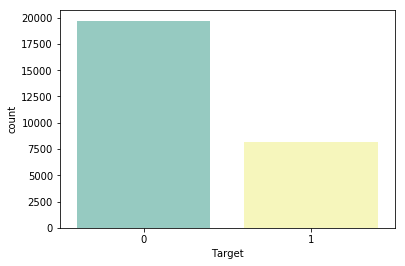

In [8]:
print(train['Target'].value_counts())
sns.countplot(train['Target'],palette='Set3')
plt.show()

The classes are not balanced.

0    9721
1    4112
Name: Target, dtype: int64


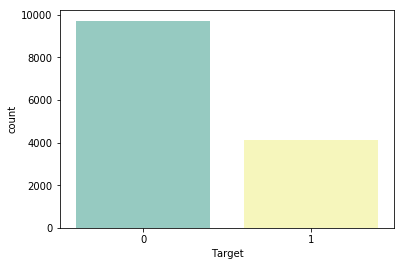

In [9]:
print(test['Target'].value_counts())
sns.countplot(test['Target'],palette='Set3')
plt.show()

## Dimensionality Reduction Steps:
- 1- **Percent missing values**: There is no missing value in the dataset
- 2- **Amount of Variation**: Drop the variables with a very low variation
- 3- **Correlation with the Target**: Drop variables which has very low correlation with the target
- 4- **Pairwise correlation**: Many variables are often correlated with each other, and hence are redundant. If two variables are highly correlated, keeping only one will help reduce dimensionallity without much loss of information. 
So I sort the features base on the higher correlation with the target first and will keep the varibales with higher correlation coefficient with the target.
- 5- **Feature importance by ensemble techniques**: Gradient boosting or Random Forest: A benefit of using ensembles of decision tree methods like gradient boosting is that they can automatically provide estimates of feature importance from a trained predictive model.

In [10]:
desc=train.describe().T
sum(desc['std']<0.01)
# There is no variable with low variance

0

### Correlation with the Target
#### Sort the columns base on the highest correlation with the Target

In [11]:
Corr1=abs(train.corr()['Target'])
CorrInd=Corr1.sort_values(ascending=False).index
train=train[list(CorrInd)]
test=test[list(CorrInd)]

### Pairwise Correlations

If two variables are highly correlated, keeping only one will help reduce dimensionality without much loss information. But which variable to keep? The one that has a higher correlation with the target. 

In [12]:
# Create correlation matrix
corr_matrix = train.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.99
to_drop = [column for column in upper.columns if any(upper[column] > 0.99)]
print('How many columns to drop?',len(to_drop))

How many columns to drop? 53


In [13]:
train.drop(to_drop,inplace=True,axis=1)
test.drop(to_drop,inplace=True,axis=1)

In [14]:
train.shape

(27913, 44)

#### Histogram of the features

I plot the histogram of each variable to get better undrestanding of each one.

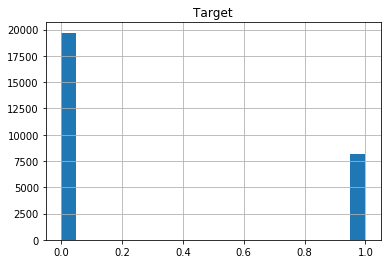

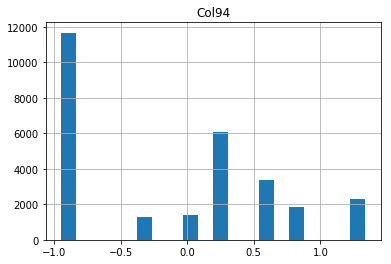

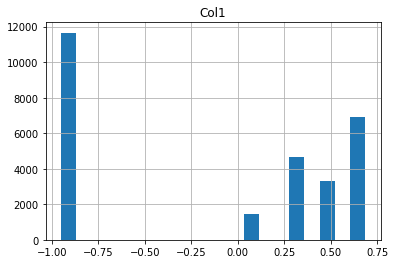

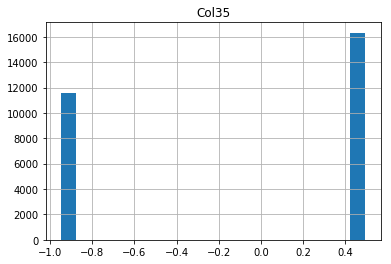

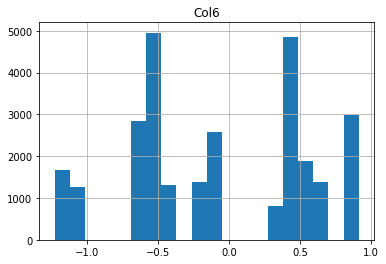

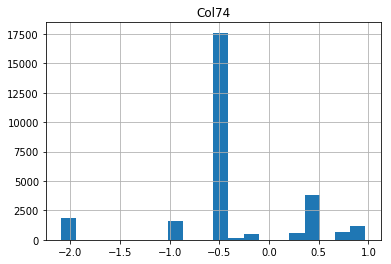

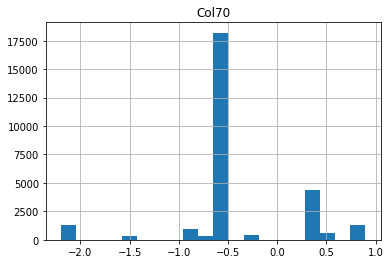

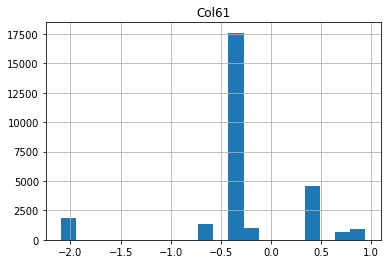

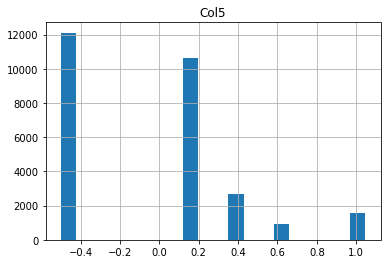

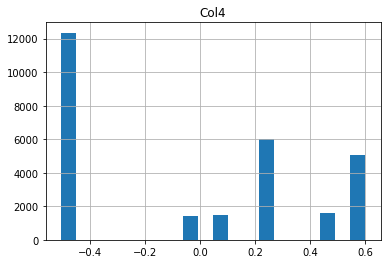

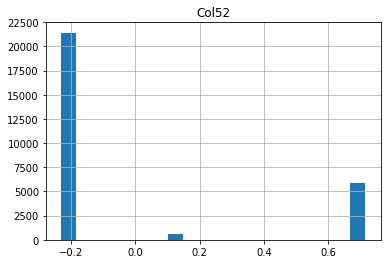

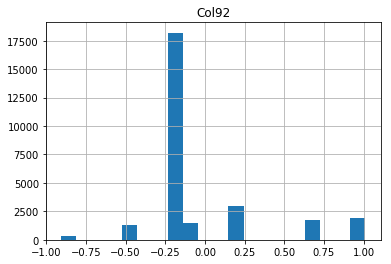

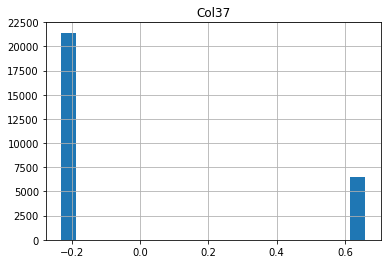

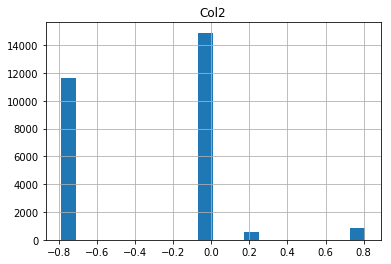

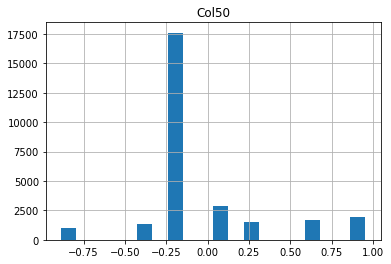

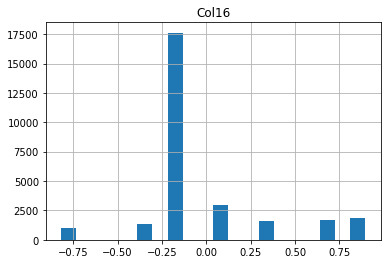

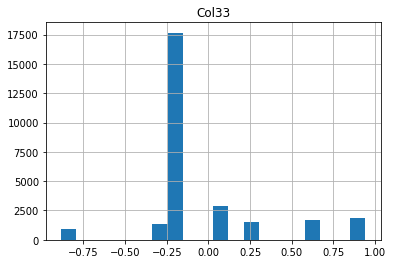

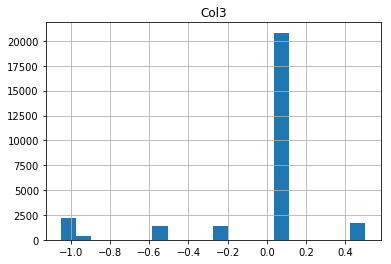

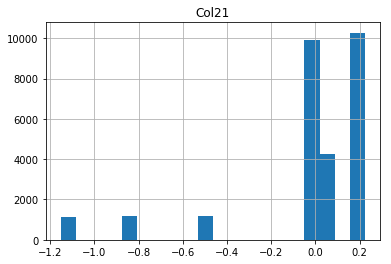

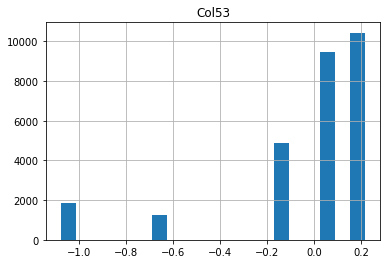

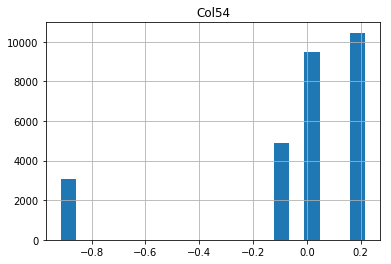

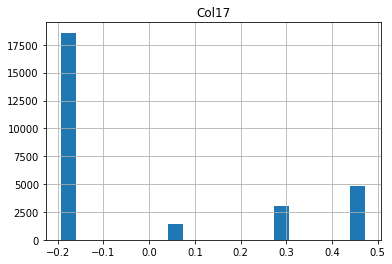

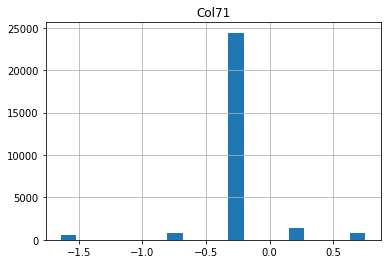

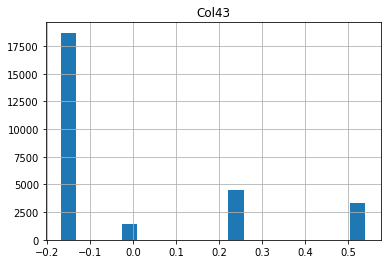

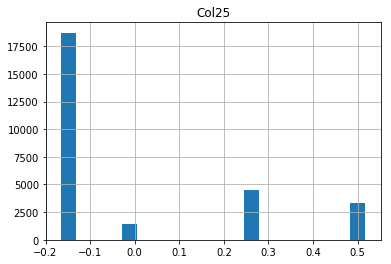

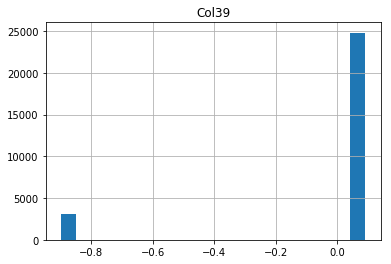

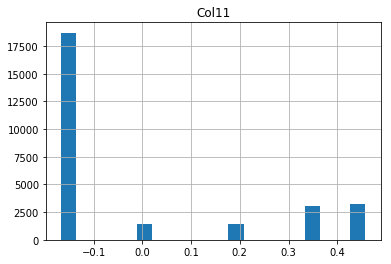

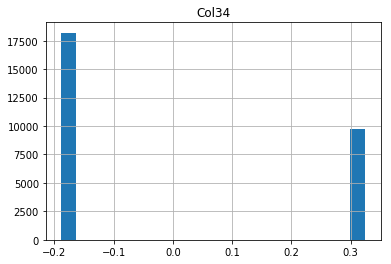

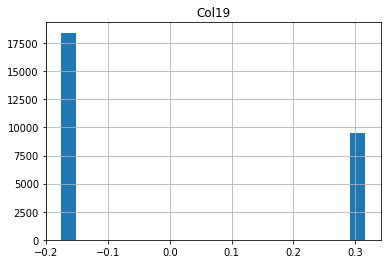

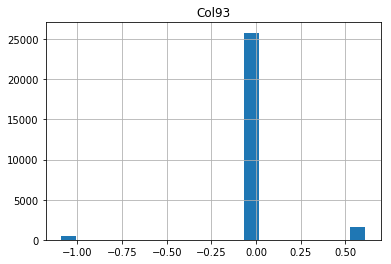

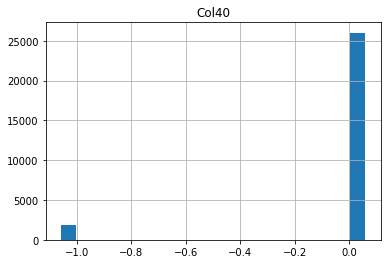

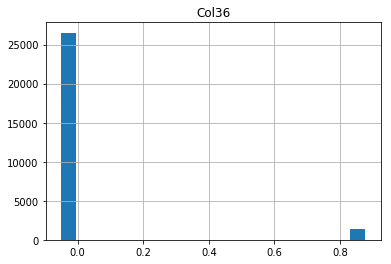

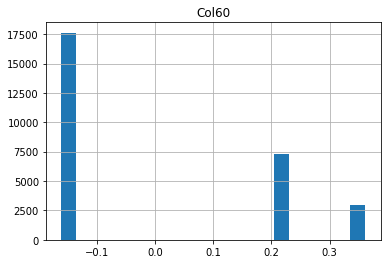

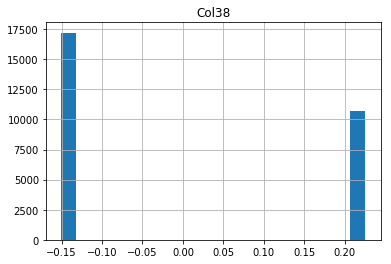

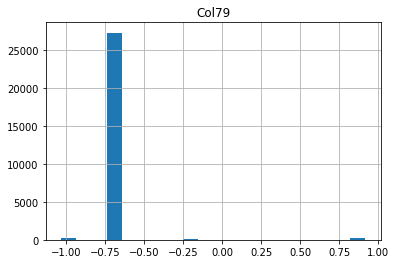

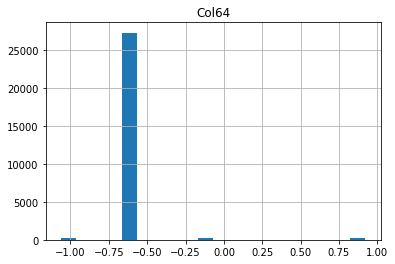

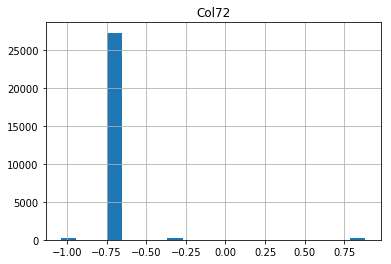

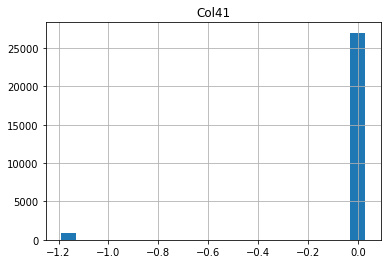

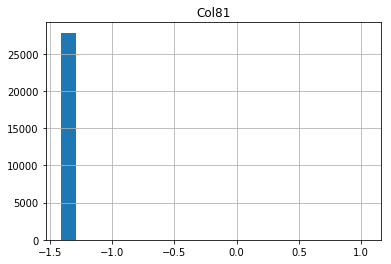

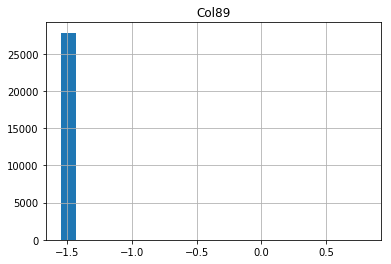

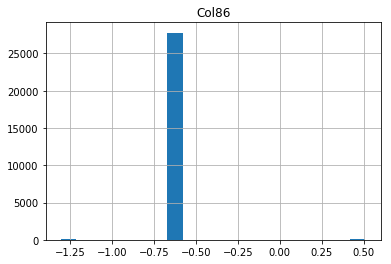

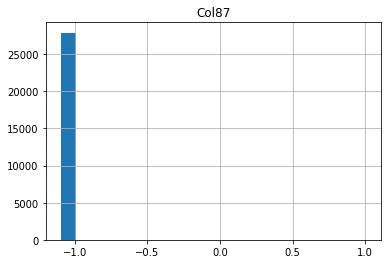

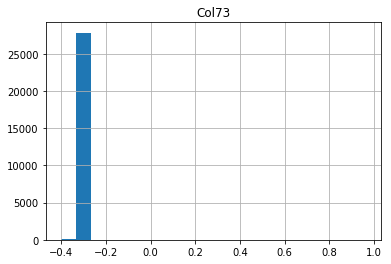

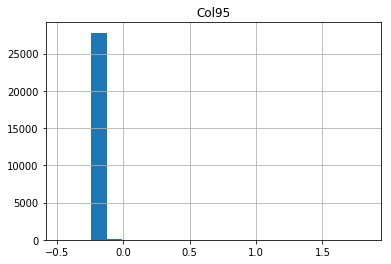

In [15]:
Cols=list(train.columns)
for i in Cols:
    train[i].hist(bins=20)
    plt.title(i)
    plt.show() 

### Preprocessing the data for classification

#### Set train/test input and output, Use standardscaler to normalize the data

In [16]:
X_train=train.iloc[:,1:]
y_train=train.iloc[:,0]
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

X=X_train.append(X_test)
y=y_train.append(y_test)

sc = StandardScaler()  
X=sc.fit_transform(X)
X_train = sc.fit_transform(X_train)  
X_test = sc.transform(X_test) 

### Defining different Classifiers

In [17]:
models1=[]
models1.append(('Logistic Regression', LogisticRegression(random_state=42)))
#models1.append(('SVM-Linear',LinearSVC(random_state=42,probability=True)))
models1.append(('KNN',KNeighborsClassifier()))
models1.append(('Random Forest', RandomForestClassifier(random_state=42)))
models1.append(('Gradient Boosting', GradientBoostingClassifier(random_state=42)))
models1.append(('XGBoost', XGBClassifier(random_state=42)))
models1.append(('LightGBM',lgb.LGBMClassifier(random_state=42)))
models1.append(('Adaboost',AdaBoostClassifier(random_state=42)))
models1.append(('Multi_Layer Perceptron',MLPClassifier(random_state=42)))
models1.append(('SVM-RBF',SVC(kernel='rbf',random_state=42, probability=True)))

In [18]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)

names = []
scores_test = []
scores_train = []
AUC1=[]
Log_loss=[]
F1_Score=[]
Time=[]
AUC=[]
for name, model in tqdm(models1):
    start=time.time()
    #Fitting the model
    model.fit(X_train, y_train)
    end=time.time()
    #Training time
    Time.append(end-start)
    y_pred = model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)[:, 1]
    scores_test.append(accuracy_score(y_test, y_pred))
    scores_train.append(accuracy_score(y_train, model.predict(X_train)))
    AUC1.append(roc_auc_score(y_test, y_pred_prob))
    AUC.append(roc_auc_score(y_train, model.predict_proba(X_train)[:, 1]))
    names.append(name)
    #F1_Score
    F1_Score.append(f1_score(y_test, y_pred))#, average=None)  
Result1 = pd.DataFrame({'Name': names, 'Train Accuracy': scores_train,'Test Accuracy': scores_test,
                        'ROC_AUC_Train':AUC,'ROC_AUC_Test':AUC1,'F1_score':F1_Score,'Execution_Time':Time})

 78%|███████▊  | 7/9 [02:33<00:18,  9.26s/it]C:\Python\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
100%|██████████| 9/9 [12:19<00:00, 176.07s/it]


In [19]:
Result1.to_csv('Result_44Features.csv', index = None, header=True)
Result_44Features=pd.read_csv('Result_44Features.csv')
Result_44Features

,Name,Train Accuracy,Test Accuracy,ROC_AUC_Train,ROC_AUC_Test,F1_score,Execution_Time
0,Logistic Regression,0.762333,0.758476,0.790016,0.783920,0.505403,1.215695
1,KNN,0.791173,0.741343,0.809487,0.731502,0.501532,2.903262
2,Random Forest,0.857844,0.739897,0.915454,0.754385,0.491951,0.351783
3,Gradient Boosting,0.772221,0.761874,0.807166,0.796748,0.518984,5.112077
4,XGBoost,0.772292,0.762091,0.806332,0.795531,0.519632,3.088232
5,LightGBM,0.785082,0.761512,0.832086,0.796987,0.528647,0.895484
6,Adaboost,0.766345,0.760428,0.795243,0.789092,0.509763,1.317246
7,Multi_Layer Perceptron,0.784437,0.756091,0.825579,0.785689,0.531259,48.737267
8,SVM-RBF,0.768925,0.756452,0.774820,0.749091,0.470366,431.007664


- All classifiers are working somehow close except random forest which is overfitted and needs to be tuned. Although for getting the best classifier I have to tune the hyperparameters for each model.
- Best evaluation metric for unbalanced dataset is ROC-AUC which represents the true positive rate and false positive rate for all probability threshold of binary classifiers. ROC curves are useful even if the predicted probabilities are not properly calibrated.  Also, F1-score which is the harmonic mean of the precision and recall is another good metric. 
- Highest ROC_AUC: LightGBM and Gradient Boosting, although LightGBM is fast it is not as robust as gradient boosting, we have some overfitting in LGB.
- Highest F1 score is with MLP although it was much slower than LightGBM. 
- Fastest classifiers are Random forest, LightGBM, and Logistic Regression.
- Slowest classifiers are SVM and KNN.


## Define some Functions

#### Classifier Function

In [20]:
def Classifier(model,X_train, y_train,X_test,y_test):
    start=time.time()
    model.fit(X_train, y_train)
    end=time.time()
    y_pred=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)[:, 1]
    y_train_pred_prob=model.predict_proba(X_train)[:, 1]
    average_precision = average_precision_score(y_test, y_pred)
    train_accuracy=round(model.score(X_train,y_train)*100,4)
    test_accuracy=round(model.score(X_test,y_test)*100,4)
    Evaluation_Metrics(train_accuracy, test_accuracy,end,start,y_test, y_pred,average_precision)
    AUC=ROC_AUC_Plot(y_train, y_train_pred_prob,y_test, y_pred_prob)
    roc_aucTrain=AUC[0]
    roc_auc=AUC[1]
    Result={'Train Accuracy':train_accuracy, 'Test Accuracy':test_accuracy,'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }
    Result=pd.DataFrame([Result], columns=Result.keys())
    return Result

#### ROC_AUC Plot Function

In [21]:
def ROC_AUC_Plot(y_train, y_train_pred_prob,y_test, y_pred_prob):
    fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(7,5))
    lw = 2
    roc_aucTrain=roc_auc
    plt.plot(fpr, tpr, color='springgreen',lw=lw, label='ROC curve for the Train(area = %0.4f)' % roc_auc)
    plt.plot([0, 1], [0, 1],lw=lw, color='navy', linestyle='--')
    roc_aucTrain=roc_auc
    fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, color='deeppink',lw=lw, label='ROC curve for the Test(area = %0.4f)' % roc_auc)
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (1 - Specificity)')
    plt.ylabel('True Positive Rate (Sensitivity)')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.grid(True)
    plt.legend(loc=0)
    plt.show()
    AUC=[roc_aucTrain,roc_auc]
    return AUC

#### Evaluation Metrics Function

In [22]:
def Evaluation_Metrics(train_accuracy, test_accuracy,end,start,y_test, y_pred,average_precision):
    print('Correct accuracy of the train set is:', train_accuracy,'%')
    print('Correct accuracy of the test set is:', test_accuracy,'%')
    print('Total elapsed time is:', round(end-start,4),' sec')
    print('Confusion Matrix is:')
    print(confusion_matrix(y_test, y_pred))
    print('log_loss is:',round(log_loss(y_test, y_pred),4))
    average_precision = average_precision_score(y_test, y_pred)
    print('Average precision-recall score: {0:0.4f}'.format(average_precision))

## Setting Hyperparameters for some of the classifiers

In this section, I focus on just 5 best classifiers for hyperparameter tuning which are:
- Logistic Regression, Random Forest, Gradient Boosting, XGBoosting, and LightGBM.
- The Tuned parameters, the train/test accuracy, train/test AUC score, Confusion matrix, Log-loss score, Average precision-recall score, ROC curve, and total elapsed time for training is provided for each classifier. 



#### Hyperparameters for Logistic Regression

In [23]:
from warnings import simplefilter
# ignore all future warnings
simplefilter(action='ignore', category=FutureWarning)
C_range =[0.001,0.01,0.03,0.05, 0.1,.5, 1, 10,100]
#param_grid = dict(C=C_range)
#LR_grid = GridSearchCV(LogisticRegression(random_state=42,penalty='l2'), param_grid,cv=5)
#LR_grid.fit(X_train, y_train)
# examine the best model
#print(LR_grid.best_score_)
#print(LR_grid.best_params_)

#### <span style="color:indigo"> **Best C is 0.1**

Correct accuracy of the train set is: 76.219 %
Correct accuracy of the test set is: 75.8476 %
Total elapsed time is: 1.0924  sec
Confusion Matrix is:
[[8784  937]
 [2404 1708]]
log_loss is: 8.342
Average precision-recall score: 0.4420


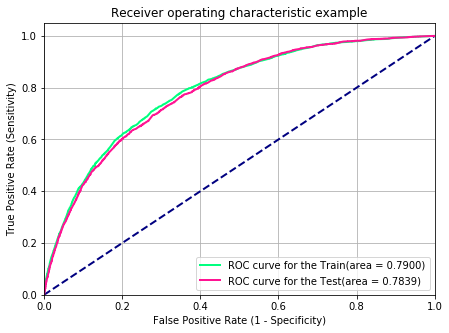

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
0,76.219,75.8476,0.790029,0.783938,0.442011,8.342,1.0924


In [24]:
model= LogisticRegression(C=.1,penalty='l2',random_state = 42)
ResultLR=Classifier(model,X_train, y_train,X_test,y_test)
ResultLR

### Set Hyperparameters for Random Forest

In [25]:
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
#rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid,random_state=42)
# Fit the random search model
#rf_random.fit(X_train,y_train)
#rf_random.best_params_, rf_random.best_score_

Best Random Forest Parameters are:

n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=10


### Random Forest with Tuned parameters

Correct accuracy of the train set is: 78.4079 %
Correct accuracy of the test set is: 76.2452 %
Total elapsed time is: 3.7129  sec
Confusion Matrix is:
[[8849  872]
 [2414 1698]]
log_loss is: 8.2047
Average precision-recall score: 0.4473


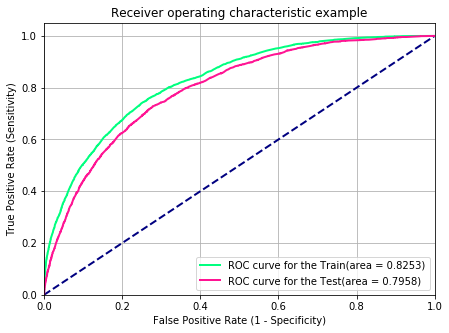

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
0,78.4079,76.2452,0.825336,0.795815,0.447338,8.2047,3.7129


In [26]:
model= RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=10, bootstrap=True,random_state =42)
ResultRF=Classifier(model,X_train, y_train,X_test,y_test)
ResultRF

### Set Hyperparameters for Gradient Boosting

In [27]:
# specify "parameter distributions" rather than a "parameter grid"
param_dist = {'max_depth':range(5,16,2),'min_samples_split':range(1000,2100,200), 
              'min_samples_leaf':range(30,71,10)}

#randGB = RandomizedSearchCV(GradientBoostingClassifier(random_state=42), param_dist, scoring='accuracy')
#randGB.fit(X_train, y_train)

#print(randGB.best_score_)
#print(randGB.best_params_)

Best parameters are:

    min_samples_split=1600, min_samples_leaf=50, max_depth=5

### Gradient Boosting with Tuned parameters

Correct accuracy of the train set is: 77.4693 %
Correct accuracy of the test set is: 76.2235 %
Total elapsed time is: 8.8389  sec
Confusion Matrix is:
[[8709 1012]
 [2277 1835]]
log_loss is: 8.2122
Average precision-recall score: 0.4522


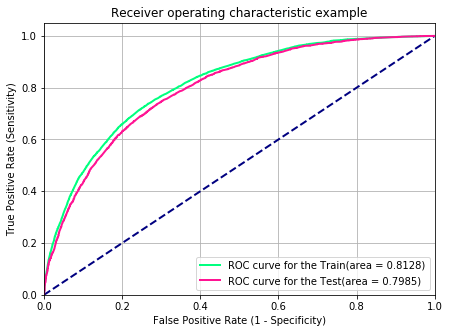

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
0,77.4693,76.2235,0.812826,0.79851,0.452235,8.2122,8.8389


In [28]:
model= GradientBoostingClassifier(random_state=42,min_samples_split=1600, min_samples_leaf=50, max_depth=5)
ResultGB=Classifier(model,X_train, y_train,X_test,y_test)
ResultGB

### Set Hyperparameters for XGBoosting

In [29]:
gridParams={'max_depth':[7,5], 'objective':['binary:logistic'],'learning_rate':[0.01,.05],
            'min_child_weight':[4,5,6],'gamma':[i/10.0 for i in range(0,5)]}

mdl = xgb.XGBClassifier(objective = 'binary')
# Create the grid
#grid = GridSearchCV(mdl, gridParams,verbose=0,cv=4,n_jobs=2)
# Run the grid

#grid.fit(X_train,y_train)

# Print the best parameters found
#print(grid.best_params_)
#print(grid.best_score_)

Best parameters are:
    
    learning_rate=0.05,max_depth=5
    

### XGBoosting with Tuned parameters

Correct accuracy of the train set is: 77.5588 %
Correct accuracy of the test set is: 76.3247 %
Total elapsed time is: 5.9696  sec
Confusion Matrix is:
[[8764  957]
 [2318 1794]]
log_loss is: 8.1772
Average precision-recall score: 0.4521


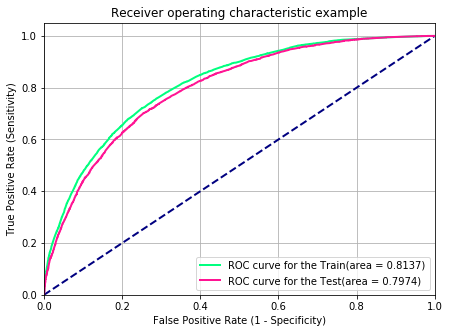

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
0,77.5588,76.3247,0.813653,0.797372,0.452083,8.1772,5.9696


In [30]:
model= xgb.XGBClassifier(learning_rate=0.05,max_depth=5,verbose=0, min_child_weight= 6 ,metric='auc',random_state=42)
Resultxgb=Classifier(model,X_train, y_train,X_test,y_test)
Resultxgb

### Set Hyperparameters for Light GBM

In [31]:
# Create parameters to search
gridParams = {
    'learning_rate': [0.05,0.1,0.01],
    'n_estimators': [40,100],
    'num_leaves': [30,50,100,150],
    'max_depth':[2,7],
    'objective' : ['binary'],
    'random_state' : [42], # Updated from 'seed'
    'metric':['auc', 'binary_logloss']
    }


#mdl = lgb.LGBMClassifier(boosting_type= 'gbdt',objective = 'binary')
# Create the grid
#grid = GridSearchCV(mdl, gridParams,verbose=0,cv=4,n_jobs=2)
# Run the grid
#grid.fit(X_train,y_train)

#Print the best parameters found
#print(grid.best_params_)
#print(grid.best_score_)

Best parameters are:
    
    learning_rate=0.1,max_depth=7, metric='auc', n_estimators=40, num_leaves= 100, objective='binary'

Correct accuracy of the train set is: 78.3721 %
Correct accuracy of the test set is: 76.3103 %
Total elapsed time is: 0.7506  sec
Confusion Matrix is:
[[8741  980]
 [2297 1815]]
log_loss is: 8.1822
Average precision-recall score: 0.4527


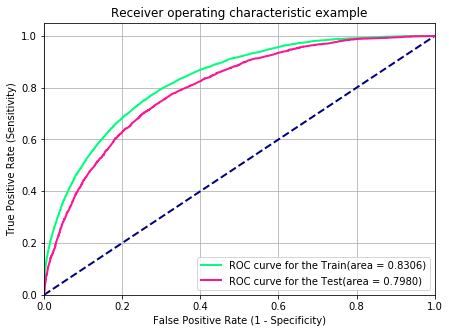

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
0,78.3721,76.3103,0.830581,0.798021,0.45268,8.1822,0.7506


In [32]:
model= lgb.LGBMClassifier(learning_rate=0.1,max_depth=7, metric='auc', n_estimators=40, num_leaves= 100, objective='binary',
                         random_state=42)
Resultlgb=Classifier(model,X_train, y_train,X_test,y_test)
Resultlgb

In [33]:
ds = [ResultLR,ResultRF,ResultGB,Resultxgb,Resultlgb]
ResultTuned=pd.concat(ds)
ResultTuned.index=['Logistic Regression','Random Forest','Gradient Boosting','XGBoosting', 'LighGBM']
ResultTuned

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
Logistic Regression,76.2190,75.8476,0.790029,0.783938,0.442011,8.3420,1.0924
Random Forest,78.4079,76.2452,0.825336,0.795815,0.447338,8.2047,3.7129
Gradient Boosting,77.4693,76.2235,0.812826,0.798510,0.452235,8.2122,8.8389
XGBoosting,77.5588,76.3247,0.813653,0.797372,0.452083,8.1772,5.9696
LighGBM,78.3721,76.3103,0.830581,0.798021,0.452680,8.1822,0.7506



- Gradient boosting and LightGBM provides the largest AUC score.
- Smallest Log loss is got from XGboosting.
- The fastest classifier was the LightGBM
- The best linear model is the logistic regression with C=0.1 and penalty of 'l2'
- The best nonlinear model is the Gradient boosting which provides the most robust and generalized classifier.


### Feature Importance by XGBoosting

Important Features in order are:
['Col6', 'Col94', 'Col5', 'Col3', 'Col1', 'Col4', 'Col21', 'Col18', 'Col92', 'Col53', 'Col2', 'Col22', 'Col52', 'Col37', 'Col90', 'Col54', 'Col74', 'Col70', 'Col61', 'Col12', 'Col13', 'Col30']
22


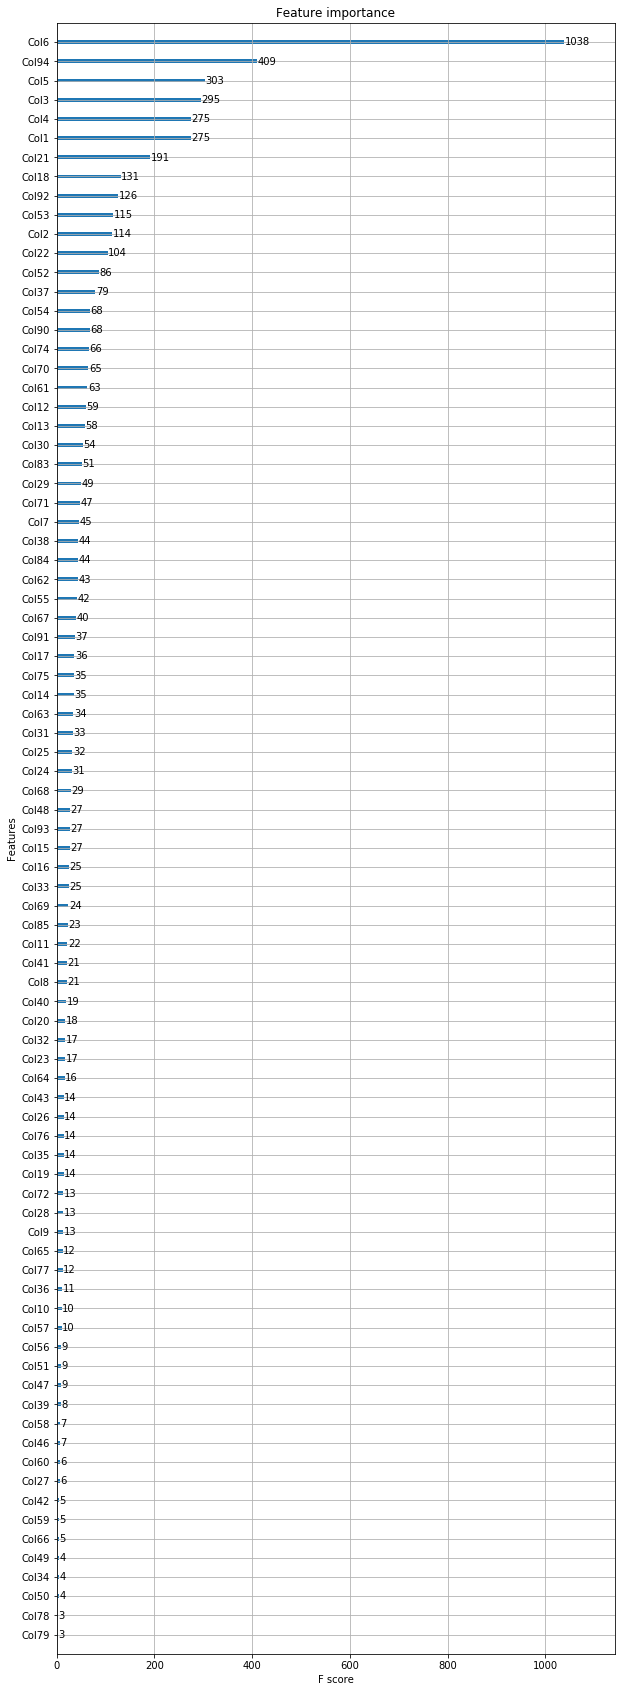

In [34]:
train=pd.read_csv('interview_data_train.csv')
test=pd.read_csv('interview_data_test.csv')
train.columns = ['Col'+str(x) for x in range(train.shape[1])]
train.rename(index=str, columns={"Col0": "Target"},inplace=True)
test.columns = ['Col'+str(x) for x in range(test.shape[1])]
test.rename(index=str, columns={"Col0": "Target"},inplace=True)
X_train=train.iloc[:,1:]
y_train=train.iloc[:,0]
X_test=test.iloc[:,1:]
y_test=test.iloc[:,0]

X=X_train.append(X_test)
y=y_train.append(y_test)
clf = XGBClassifier(random_state=42,subsample=0.8,reg_lambda=100.0,n_estimators=100,min_child_weight=7.0,
                              max_depth=20,learning_rate=0.1,gamma= 0.5,colsample_bytree=1.0,colsample_bylevel=0.4)
clf.fit(X_train, y_train)

# Find feature importances
features = pd.Series(clf.feature_importances_, index=X_train.columns)
# Find feature importances
feature_importance = pd.DataFrame(clf.feature_importances_).T
feature_importance.columns = list(X_train.columns)
feature_importance = feature_importance.T
feature_importance.columns = ['feature_importance']
feature_importance.sort_values('feature_importance', ascending=False)
features = pd.Series(clf.feature_importances_, index=X_train.columns)
ax=plot_importance(clf)
fig=ax.figure
fig.set_size_inches(10,30)
fig.savefig('features.png', dpi=100)
Imp=(feature_importance.sort_values('feature_importance', ascending=False)>0.01)['feature_importance'].sum()
ImpCols=feature_importance.sort_values('feature_importance', ascending=False)[:Imp].index
print('Important Features in order are:')
print(list(ImpCols))
print(len(ImpCols))
X_train=X_train[list(ImpCols)]
X_test=X_test[list(ImpCols)]

- A benefit of using XGBboosting is that after the boosted trees are constructed, it is relatively straightforward to retrieve importance scores for each attribute.
- Generally, importance provides a score that indicates how useful or valuable each feature was in the construction of the boosted decision trees within the model. The more an attribute is used to make key decisions with decision trees, the higher its relative importance.
- This importance is calculated explicitly for each attribute in the dataset, allowing attributes to be ranked and compared to each other.
- Importance is calculated for a single decision tree by the amount that each attribute split point improves the performance measure, weighted by the number of observations the node is responsible for. The performance measure may be the purity (Gini index) used to select the split points or another more specific error function.
- The feature importances are then averaged across all of the the decision trees within the model.

### Classification with 23 selected features

In [35]:
def ROC_AUC_Plot(y_train, y_train_pred_prob,y_test, y_pred_prob):
    fpr, tpr, thresholds=roc_curve(y_train, y_train_pred_prob)
    roc_auc = auc(fpr, tpr)
    lw = 2
    roc_aucTrain=roc_auc
    roc_aucTrain=roc_auc
    fpr, tpr, thresholds=roc_curve(y_test, y_pred_prob)
    roc_auc = auc(fpr, tpr)
    AUC=[roc_aucTrain,roc_auc]
    return AUC

def Classifier(model,X_train, y_train,X_test,y_test):
    start=time.time()
    model.fit(X_train, y_train)
    end=time.time()
    y_pred=model.predict(X_test)
    y_pred_prob=model.predict_proba(X_test)[:, 1]
    y_train_pred_prob=model.predict_proba(X_train)[:, 1]
    average_precision = average_precision_score(y_test, y_pred)
    train_accuracy=round(model.score(X_train,y_train)*100,4)
    test_accuracy=round(model.score(X_test,y_test)*100,4)
    AUC=ROC_AUC_Plot(y_train, y_train_pred_prob,y_test, y_pred_prob)
    roc_aucTrain=AUC[0]
    roc_auc=AUC[1]
    Result={'Train Accuracy':train_accuracy, 'Test Accuracy':test_accuracy,'AUC Train':roc_aucTrain, 'AUC Test':roc_auc,'Average Precision Score':average_precision,
          'Log Loss Score':round(log_loss(y_test, y_pred),4),'Elapsed Time':round(end-start,4) }
    Result=pd.DataFrame([Result], columns=Result.keys())
    return Result

In [36]:
model= LogisticRegression(C=.1,penalty='l2',random_state = 42)
ResultLR=Classifier(model,X_train, y_train,X_test,y_test)
model= RandomForestClassifier(n_estimators=200,min_samples_split=5,min_samples_leaf=2,max_features='sqrt',max_depth=10,
bootstrap=True,random_state =42)
ResultRF=Classifier(model,X_train, y_train,X_test,y_test)
model= GradientBoostingClassifier(random_state=42,min_samples_split=1600, min_samples_leaf=50, max_depth=5)
ResultGB=Classifier(model,X_train, y_train,X_test,y_test)
model= xgb.XGBClassifier(learning_rate=0.05,max_depth=5,verbose=0, metric='auc',random_state=42)
Resultxgb=Classifier(model,X_train, y_train,X_test,y_test)
model= lgb.LGBMClassifier(learning_rate=0.1,max_depth=7, metric='auc', n_estimators=40, num_leaves= 100, objective='binary',
                         random_state=42)
Resultlgb=Classifier(model,X_train, y_train,X_test,y_test)
ds = [ResultLR,ResultRF,ResultGB,Resultxgb,Resultlgb]
Result_Tuned_23Features=pd.concat(ds)
Result_Tuned_23Features.index=['Logistic Regression','Random Forest','Gradient Boosting','XGBoosting', 'LighGBM']
Result_Tuned_23Features  #23 selected Features with XGBoosting

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
Logistic Regression,76.1473,75.7030,0.787195,0.781177,0.439681,8.3919,0.3378
Random Forest,78.7196,76.1151,0.830598,0.796245,0.446459,8.2496,5.2930
Gradient Boosting,77.4478,76.0934,0.812414,0.796728,0.450309,8.2571,8.1373
XGBoosting,77.6699,76.0934,0.814373,0.796948,0.447489,8.2571,3.5190
LighGBM,78.1858,76.2235,0.829125,0.797300,0.451922,8.2122,0.4278


- Gradient boosting and LighGBM provides the best AUC score. 
- LightGBM is faster and I pick this nonlinear model as the best classifier for 23 selected features as well.

In [37]:
Result_44Features # Results with 44 Features before tuning classifiers

,Name,Train Accuracy,Test Accuracy,ROC_AUC_Train,ROC_AUC_Test,F1_score,Execution_Time
0,Logistic Regression,0.762333,0.758476,0.790016,0.783920,0.505403,1.215695
1,KNN,0.791173,0.741343,0.809487,0.731502,0.501532,2.903262
2,Random Forest,0.857844,0.739897,0.915454,0.754385,0.491951,0.351783
3,Gradient Boosting,0.772221,0.761874,0.807166,0.796748,0.518984,5.112077
4,XGBoost,0.772292,0.762091,0.806332,0.795531,0.519632,3.088232
5,LightGBM,0.785082,0.761512,0.832086,0.796987,0.528647,0.895484
6,Adaboost,0.766345,0.760428,0.795243,0.789092,0.509763,1.317246
7,Multi_Layer Perceptron,0.784437,0.756091,0.825579,0.785689,0.531259,48.737267
8,SVM-RBF,0.768925,0.756452,0.774820,0.749091,0.470366,431.007664


In [38]:
ResultTuned # Results with 44 Features after tuning classifiers

,Train Accuracy,Test Accuracy,AUC Train,AUC Test,Average Precision Score,Log Loss Score,Elapsed Time
Logistic Regression,76.2190,75.8476,0.790029,0.783938,0.442011,8.3420,1.0924
Random Forest,78.4079,76.2452,0.825336,0.795815,0.447338,8.2047,3.7129
Gradient Boosting,77.4693,76.2235,0.812826,0.798510,0.452235,8.2122,8.8389
XGBoosting,77.5588,76.3247,0.813653,0.797372,0.452083,8.1772,5.9696
LighGBM,78.3721,76.3103,0.830581,0.798021,0.452680,8.1822,0.7506


## Conclusion

- 1- Best Linear Calssifier is: **LogisticRegression(C=.1,penalty='l2',random_state = 42)**

With 44 features, penalty type of 'l2' and C=0.1. Test Accuracy=**75.8476%** and roc_auc=**0.783938.**

| Linear Classifier|Train Accuracy|Test Accuracy |AUC Train | AUC Test |AVG Precision-Recall Score | Log Loss Score |Elapsed Time |
| --- | --- | --- |  | | |
| Logistic Regression |76.2190%|75.8476%| 0.790029| 0.783938 |0.442011| 8.342| 1.0924 sec|



- 2- Best Nonlinear Classifier is: 

**Gradient Boosting** and LightGBM provide the best AUC score and smallest Log-Loss. Although LightGBM is pretty fast, But I recommend to use **Gradient boosting** since it is more robust and provides better generalization.


 **GradientBoostingClassifier(random_state=42,min_samples_split=1600, min_samples_leaf=50, max_depth=5)**
           
Best nonlinear classifier is gradient boosting with 44 features, min_samples_split=1600, min_samples_leaf=50, max_depth=5 roc_auc=**0.79851** and log-loss=**8.2122**.

|NonLinear Classifier|Train Accuracy|Test Accuracy |AUC Train | AUC Test |AVG Precision-Recall Score | Log Loss Score |Elapsed Time |
| --- | --- | --- |  | | |
| Gradient Boosting |77.4693%|76.2235%|0.812826|0.798510|0.452235|8.2122|8.8389 sec|
| LightGBM |78.3721%|76.3103%|0.830581|0.798021|0.452680|8.1822|0.7506 sec|

- 3- Choosing a **classification threshold** is a business decision to see if to minimize the false positive rate or maximize true positive rate. 


- 4- Most Important Features in order are:

**['Col6', 'Col94', 'Col5', 'Col3', 'Col1', 'Col4', 'Col21', 'Col18', 'Col92', 'Col53', 'Col2', 'Col22', 'Col52', 'Col37', 'Col90', 'Col54', 'Col74', 'Col70', 'Col61', 'Col12', 'Col13', 'Col30']**

 These columns are the most correlated columns to the Target. 

- **5- For Future**: I would also find the Weight of evidence and Information Value which have a connection with the logistic regression modeling technique. It could help to find better features and provides information about multicollinearity among columns which could help to get the smaller difference between AUC train and AUC test scores.
- **6- For Future**: If I had more time I could try feature extraction techniques like PCA to see if it could improve the performance slightly.
- **7- For Future**:  I could also use some optimization techniques for tuning the hyperparameters or try other values in the Grid search to get a better-generalized model. 